In [13]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [44]:
# Load data

data = pd.read_excel('https://s3.amazonaws.com/stockx-sneaker-analysis/wp-content/uploads/2019/02/StockX-Data-Contest-2019.xlsx', sheet_name = 1)
df = data.copy()
df.head()
df_1 = df.copy()

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])

df['Order Date'] = df['Order Date'].apply(lambda x: x.toordinal())
df['Release Date'] = df['Release Date'].apply(lambda x: x.toordinal())

df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,736573,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,736231,11.0,California
1,736573,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,736291,11.0,California
2,736573,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,736291,11.0,California
3,736573,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,736291,11.5,Kentucky
4,736573,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,736371,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,737103,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,737054,8.0,Oregon
99952,737103,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,737054,8.5,California
99953,737103,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,737054,5.5,New York
99954,737103,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,737054,11.0,California


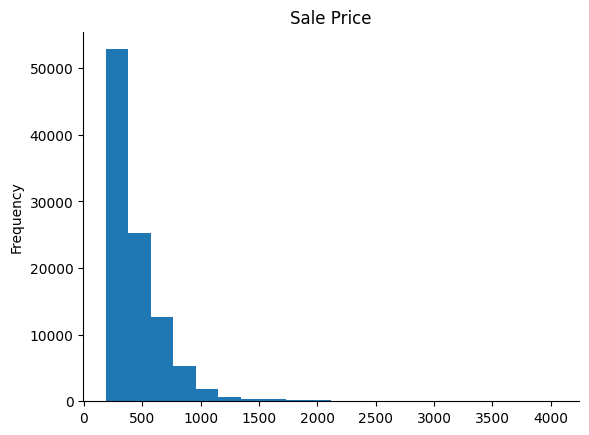

In [11]:
# @title Sale Price

from matplotlib import pyplot as plt
df['Sale Price'].plot(kind='hist', bins=20, title='Sale Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df['Delta'] = (df['Sale Price'] - df['Retail Price'])/df['Retail Price']
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Delta
0,736573,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,736231,11.0,California,3.986364
1,736573,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,736291,11.0,California,2.113636
2,736573,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,736291,11.0,California,2.136364
3,736573,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,736291,11.5,Kentucky,3.886364
4,736573,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,736371,11.0,Rhode Island,2.763636
...,...,...,...,...,...,...,...,...,...
99951,737103,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,737054,8.0,Oregon,1.568182
99952,737103,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,737054,8.5,California,1.718182
99953,737103,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,737054,5.5,New York,1.750000
99954,737103,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,737054,11.0,California,1.954545


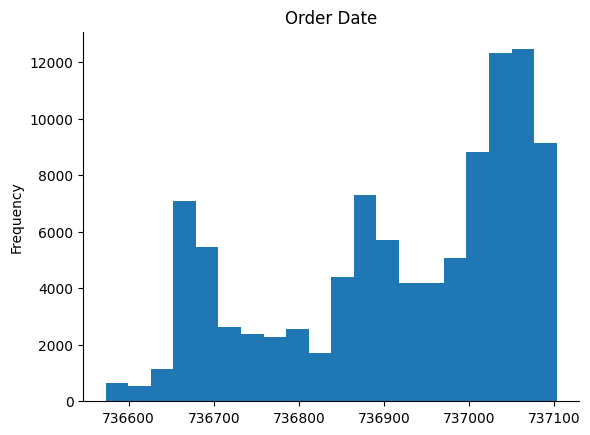

In [10]:
# @title Order Date

from matplotlib import pyplot as plt
df['Order Date'].plot(kind='hist', bins=20, title='Order Date')
plt.gca().spines[['top', 'right',]].set_visible(False)

size and price, where retail proce = 200, to make it easier for visualization

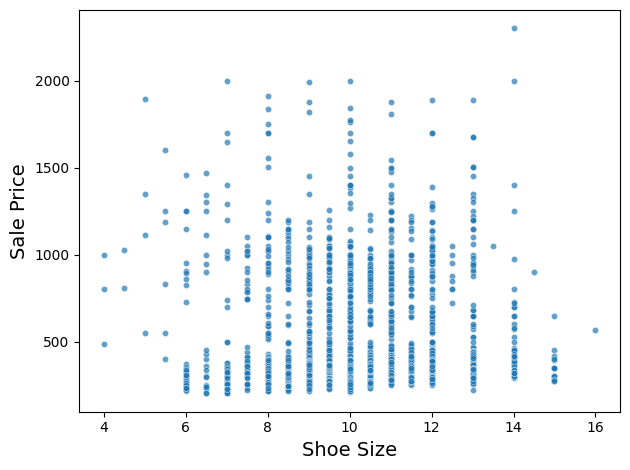

In [33]:
sns.scatterplot(data=df[df['Retail Price'] == 200], x='Shoe Size', y='Sale Price', s=20, alpha=0.7)
plt.xlabel('Shoe Size', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.tight_layout()
plt.show()

shoe sales change over time

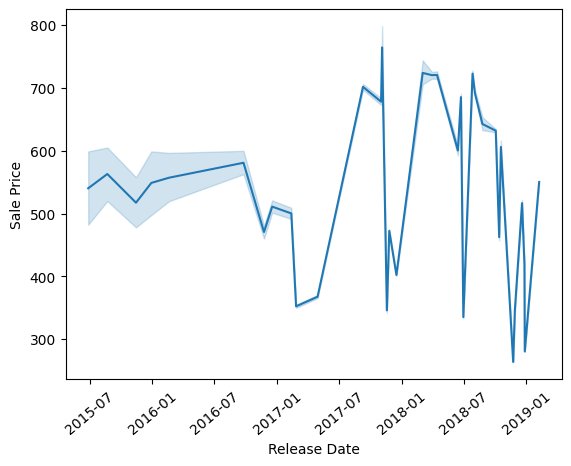

In [51]:
sales_smooth = df['Sale Price'].rolling(30).mean()
sns.lineplot(x = df_1['Release Date'], y=sales_smooth)
plt.xticks(rotation=40)
plt.show()



sales by region for the top ten states

```
# This is formatted as code
```



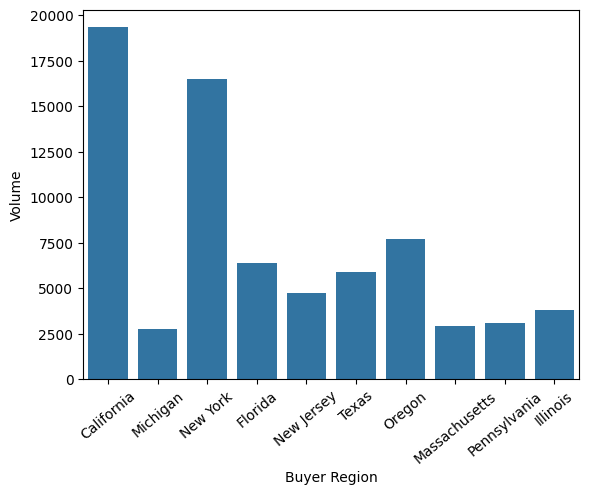

In [73]:
top_10_states = df['Buyer Region'].value_counts().nlargest(10).index
# Filter the dataframe to include only the top 10 states
df_top_10 = df[df['Buyer Region'].isin(top_10_states)]

sns.countplot(df_top_10, x='Buyer Region')
plt.ylabel('Volume')
plt.xticks(rotation=40)
plt.show()

retail price vs sale price

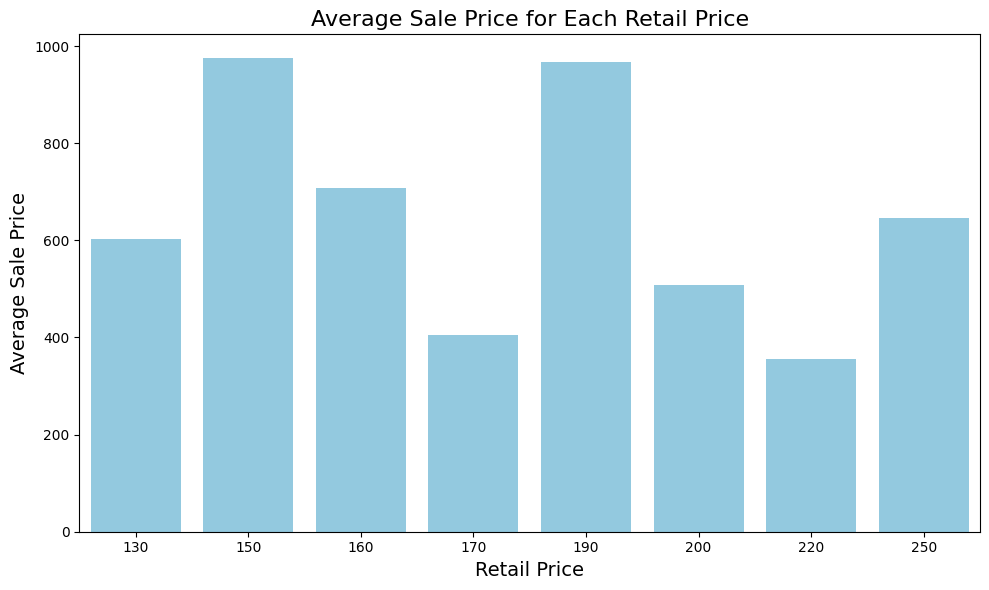

In [65]:

# Calculate the average sale price for each retail price
avg_sale_prices = df.groupby('Retail Price')['Sale Price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sale_prices, x='Retail Price', y='Sale Price', color='skyblue')


plt.xlabel('Retail Price', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.title('Average Sale Price for Each Retail Price', fontsize=16)
plt.tight_layout()
plt.show()

correlation matrix

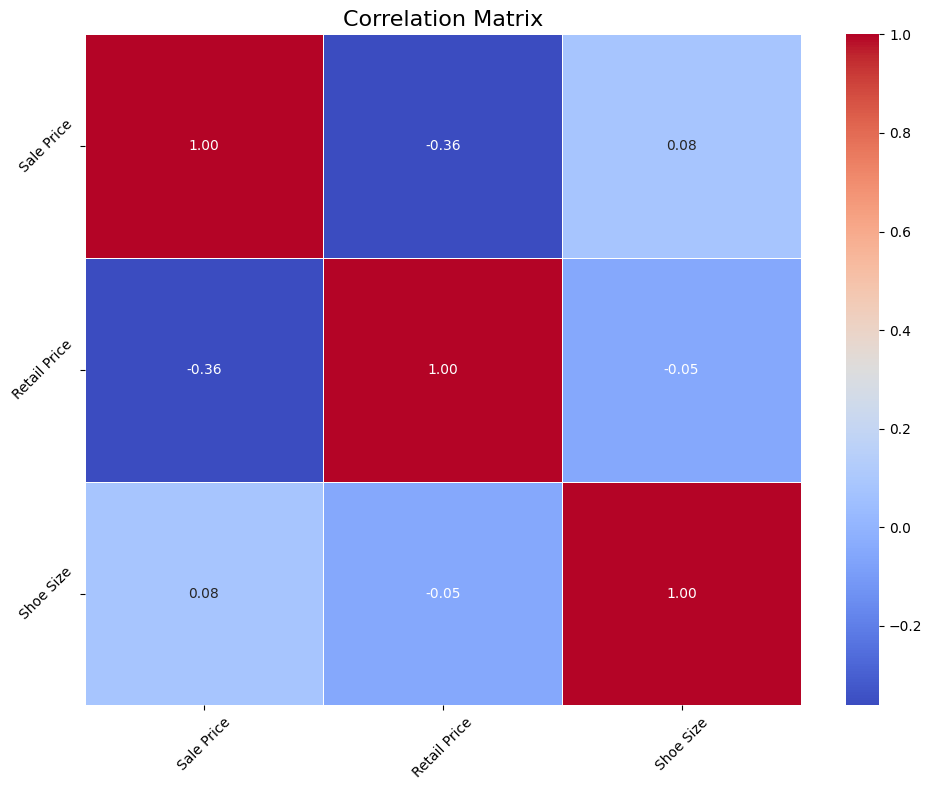

In [67]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])


# Calculate the correlation matrix
corr = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

volume and brand

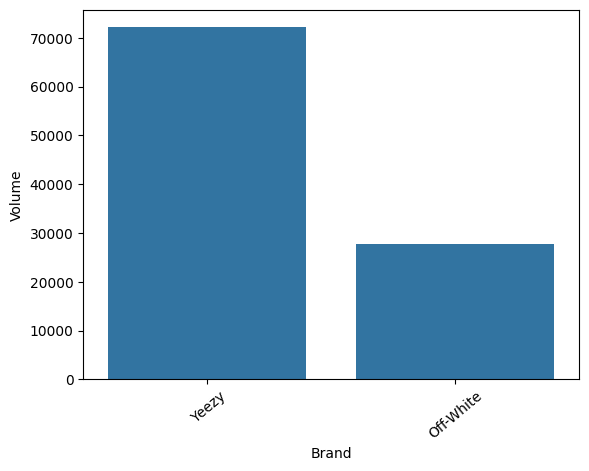

In [72]:
sns.countplot(df, x='Brand')
plt.ylabel('Volume')
plt.xticks(rotation=40)
plt.show()

sneaker name and volume

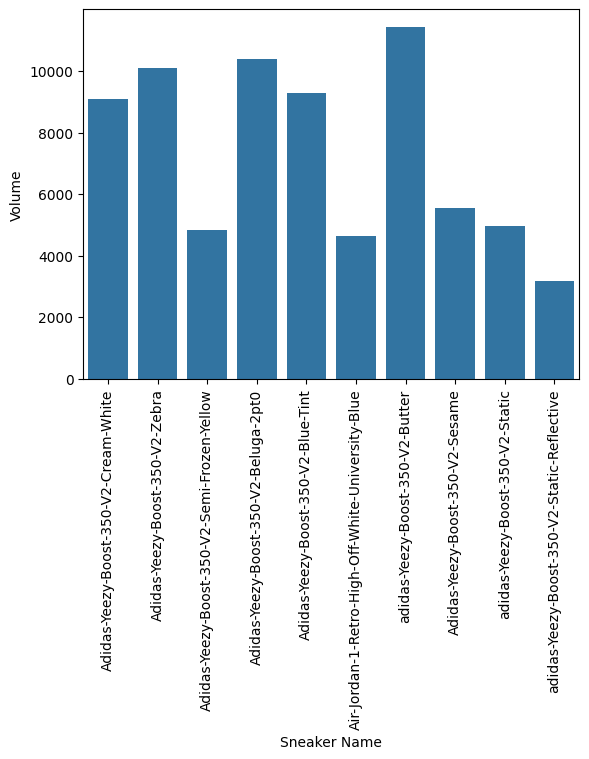

In [78]:
# Find the top 10 sneakers
top_10_sneakers = df['Sneaker Name'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 sneakers
df_top_10 = df[df['Sneaker Name'].isin(top_10_sneakers)]

# Plot the countplot
sns.countplot(data=df_top_10, x='Sneaker Name')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.show()